In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Example 1: Iris dataset

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = iris['data']
y = iris['target']

In [74]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler

In [75]:
X_scale = StandardScaler(with_mean=False).fit_transform(X)

In [76]:
X_scale.shape

(150, 4)

In [77]:
X_scale.var(axis=0)

array([1., 1., 1., 1.])

In [65]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [78]:
pca = PCA(n_components=2)
pca.fit(X_scale)

PCA(n_components=2)

In [79]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [80]:
print('We have {}% information loss.'.format(np.round(100*(1 - np.sum(pca.explained_variance_ratio_)), 3)))

We have 4.187% information loss.


In [81]:
lda = LDA(n_components=2)
lda.fit(X_scale, y)

LinearDiscriminantAnalysis(n_components=2)

In [82]:
lda.explained_variance_ratio_.sum()

0.9999999999999999

In [83]:
print('We have {}% information loss.'.format(100*(1 - np.sum(lda.explained_variance_ratio_))))

We have 1.1102230246251565e-14% information loss.


In [84]:
X_2d_pca = pca.transform(X_scale)
X_2d_lda = lda.transform(X_scale)

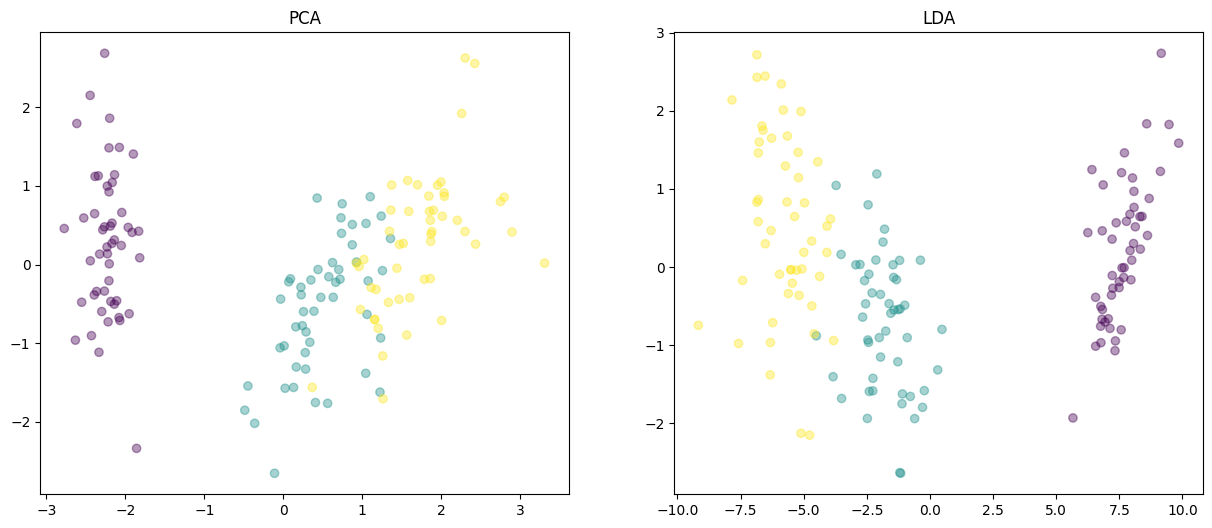

In [85]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.title('PCA')
plt.scatter(X_2d_pca[:, 0], X_2d_pca[:, 1], c=y, alpha=0.4);

plt.subplot(122)
plt.title('LDA')
plt.scatter(X_2d_lda[:, 0], X_2d_lda[:, 1], c=y, alpha=0.4);

# Example 2: Digit Classification

In [112]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [87]:
X, y = load_digits(return_X_y=True)

In [89]:
X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size=0.3)

In [90]:
X_train.shape, X_test.shape, y_trian.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [104]:
pca = PCA(n_components=0.90)
pca.fit(X_train)

PCA(n_components=0.9)

In [107]:
pca.n_components_

21

In [108]:
(1 - pca.explained_variance_ratio_.sum()) * 100

9.550205481869567

In [109]:
clf = KNN(n_neighbors=7)
clf.fit(X=pca.transform(X_train), y=y_trian)

KNeighborsClassifier(n_neighbors=7)

In [110]:
y_pred = clf.predict(X=pca.transform(X_test))

In [111]:
print(accuracy_score(y_true=y_test, y_pred=y_pred))

0.9851851851851852


In [113]:
n_components = []
accuracy = []

for n in range(5, 56, 5):
    clf = Pipeline(steps=[('dimension reduction', PCA(n_components=n)),
                          ('classifier', KNN(n_neighbors=7))])
    clf.fit(X_train, y_trian)
    
    n_components.append(n)
    accuracy.append(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
    

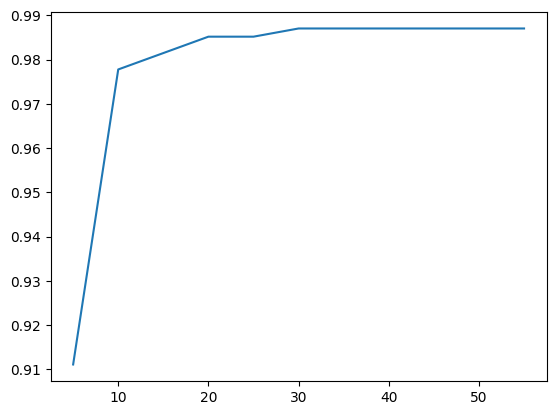

In [115]:
plt.plot(n_components, accuracy);